In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [345]:
# read the data file

df = pd.ExcelFile('dataset.xlsx').parse('All'); 
dfcpy = df.copy()
dfcpy = dfcpy[['SARS-Cov-2 exam result','Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 
               'Urea', 'Potassium', 'Sodium']]
dfcpy.shape

(5644, 9)

In [346]:
dfcpy.describe()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Urea,Potassium,Sodium
count,6.030000e+02,6.020000e+02,6.020000e+02,5.130000e+02,6.020000e+02,3.970000e+02,3.710000e+02,3.700000e+02
mean,-1.601319e-08,6.215833e-09,-7.866736e-09,5.908361e-09,-6.633740e-09,-6.675260e-09,2.038366e-08,1.123628e-08
std,1.000830e+00,1.000832e+00,1.000832e+00,1.000976e+00,1.000832e+00,1.001262e+00,1.001350e+00,1.001354e+00
min,-4.345603e+00,-2.020303e+00,-1.865070e+00,-3.339775e+00,-1.140144e+00,-1.630410e+00,-2.283079e+00,-5.246946e+00
25%,-5.862439e-01,-6.372547e-01,-7.307069e-01,-6.518655e-01,-5.292256e-01,-5.883426e-01,-8.001102e-01,-5.750077e-01
50%,4.031596e-02,-2.128790e-01,-1.426696e-02,-5.364196e-02,-2.237665e-01,-1.417422e-01,-5.862590e-02,1.437519e-01
75%,7.295320e-01,4.542955e-01,5.976919e-01,6.838943e-01,3.871516e-01,4.537250e-01,6.828590e-01,5.031317e-01
max,2.671868e+00,4.522042e+00,3.764100e+00,2.535929e+00,1.107822e+01,1.124657e+01,3.401635e+00,4.096930e+00


In [353]:
df_positive = dfcpy[dfcpy['SARS-Cov-2 exam result'] == 'positive']
df_positive = df_positive[['Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 
               'Urea', 'Potassium', 'Sodium']]
df_positive = df_positive.dropna()
df_positive.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Urea,Potassium,Sodium
568,0.792188,-0.420197,-0.048383,-0.414215,1.303529,-0.513909,-0.058626,0.143752
884,-0.398276,-0.820919,-0.935404,1.282118,-1.140144,0.974759,-1.047272,0.862512
1108,-0.648900,-0.968407,-0.099557,-0.315877,-0.529226,0.304858,0.682859,1.940651
1162,-0.272964,-0.573250,-0.457777,-0.127395,-0.223767,-0.588343,-0.800110,-0.575008
1494,-0.147652,-1.335736,1.614780,-1.782754,-0.223767,-0.886076,-0.305787,0.143752


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10299ab748>,
      dtype=object)

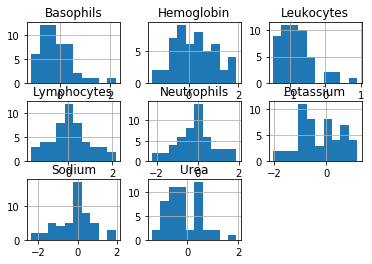

In [354]:
#df_positive histograms
df_positive.hist()

In [356]:
df_negative = dfcpy[dfcpy['SARS-Cov-2 exam result'] == 'negative']
df_negative = df_negative[['Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 
               'Urea', 'Potassium', 'Sodium']]
df_negative = df_negative.dropna()
df_negative.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Urea,Potassium,Sodium
1,-0.022340,-0.094610,0.318366,-0.619086,-0.223767,1.198059,-0.305787,0.862512
8,-0.774212,0.364550,-0.005738,-0.127395,-0.223767,-0.067309,0.930020,0.503132
15,-0.586244,-0.884923,-1.114514,0.880570,0.081693,-0.811643,0.435697,-0.215628
22,-0.147652,-1.132592,0.002791,-0.422410,0.387152,-1.332677,-0.552949,-0.575008
30,-0.711556,-0.286623,-0.875701,0.782232,-0.223767,-0.439476,0.435697,-1.653147


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1029712908>,
      dtype=object)

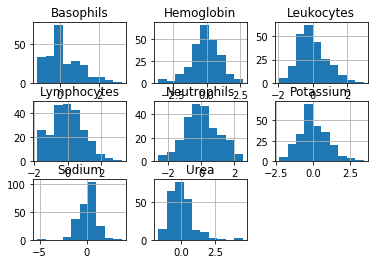

In [357]:
#df_negative histograms
df_negative.hist()

In [358]:
#standardization
scaler = StandardScaler()
std_data = scaler.fit_transform(df_negative.values)
std_df_negative = pd.DataFrame(std_data, index=df_negative.index, columns=df_negative.columns)
std_df_negative.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Urea,Potassium,Sodium
1,0.041503,-0.097060,0.339118,-0.633777,-0.462848,1.437671,-0.331186,0.852548
8,-0.679899,0.463017,0.001302,-0.157622,-0.462848,-0.095870,0.945483,0.477301
15,-0.499548,-1.061070,-1.154386,0.818495,-0.091638,-0.997953,0.434815,-0.273192
22,-0.078731,-1.363172,0.010192,-0.443316,0.279573,-1.629411,-0.586520,-0.648439
30,-0.619782,-0.331274,-0.905469,0.723264,-0.462848,-0.546911,0.434815,-1.774179


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f102915a128>,
      dtype=object)

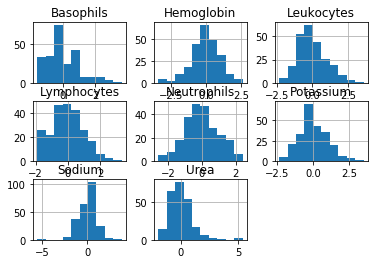

In [361]:
std_df_negative.hist()

In [359]:
#standardization
scaler = StandardScaler()
std_data_pos= scaler.fit_transform(df_positive.values)
std_df_positive = pd.DataFrame(std_data_pos, index=df_positive.index, columns=df_positive.columns)
std_df_positive.head()

,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Urea,Potassium,Sodium
568,0.687139,0.781905,-0.177987,-0.328427,2.230052,-0.570021,0.270340,0.316021
884,-0.792500,-0.044683,-1.196374,1.517797,-1.592895,1.710062,-0.955201,1.102220
1108,-1.104004,-0.348914,-0.236740,-0.221400,-0.637158,0.684025,1.189495,2.281518
1162,-0.636749,0.466194,-0.648012,-0.016264,-0.159289,-0.684025,-0.648815,-0.470178
1494,-0.480997,-1.106620,1.731488,-1.817894,-0.159289,-1.140041,-0.036045,0.316021


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f102952c828>,
      dtype=object)

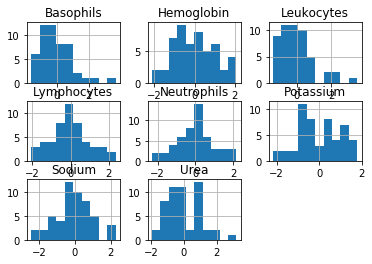

In [360]:
#df_negative histograms
std_df_positive.hist()